In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head(2)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6


### Median value of owner-occupied homes Boxplot

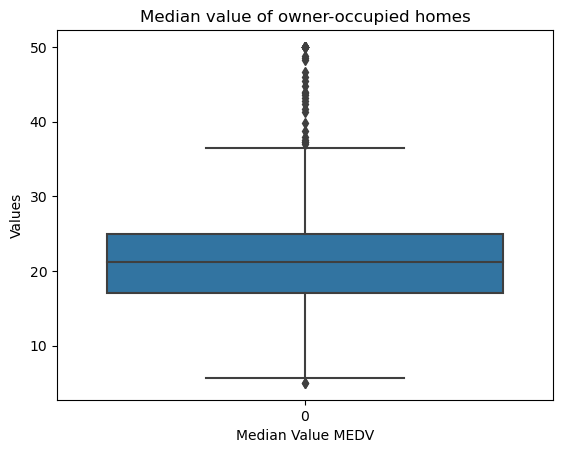

In [3]:
sns.boxplot(boston_df['MEDV'])
plt.title('Median value of owner-occupied homes')
plt.xlabel('Median Value MEDV')
plt.ylabel('Values')
plt.show()

#### Median value is between 20 and 30 for owner occupied homes

### Bar plot for the Charles river variable

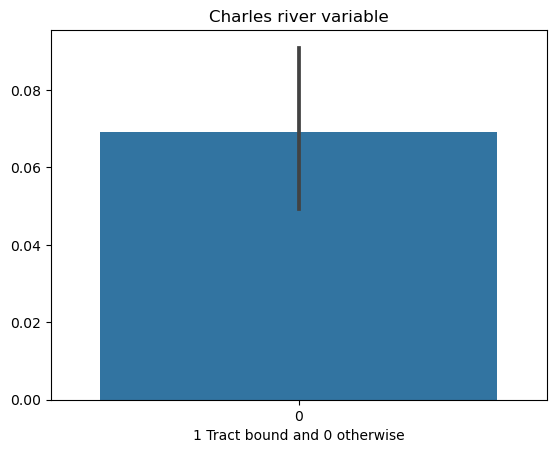

In [4]:
sns.barplot(boston_df['CHAS'])
plt.xlabel('1 Tract bound and 0 otherwise')
plt.title('Charles river variable')
plt.show()

#### Boxplot for the MEDV variable vs the AGE variable

In [5]:
age_group = [0,35,70,float('inf')]
age_groups = ['35','35-70','above70']


In [6]:
boston_df["aged_class"] = pd.cut(boston_df['AGE'],bins = age_group ,labels= age_groups,include_lowest=False)
print(boston_df['aged_class'].head(4))

0      35-70
1    above70
2      35-70
3      35-70
Name: aged_class, dtype: category
Categories (3, object): ['35' < '35-70' < 'above70']


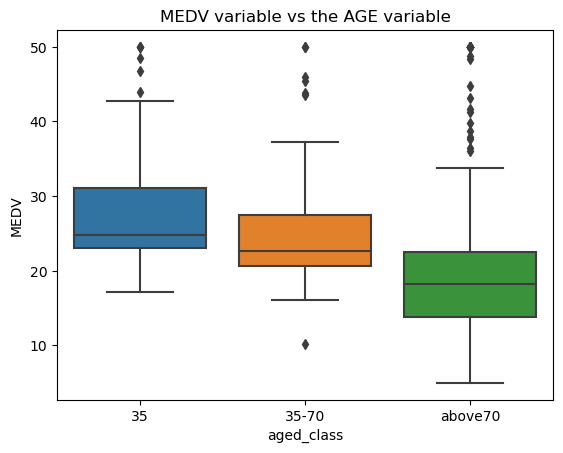

In [7]:
sns.boxplot(data = boston_df,x='aged_class', y='MEDV')
plt.title('MEDV variable vs the AGE variable')
plt.xlabel('aged_class')
plt.ylabel('MEDV')
plt.show()


##### Median value of owner-occupied homes in $1000's is 
##### more for 35 age and below group
##### and the lowest is for above 70 aged.


### scatter plot to show the relationship between Nitric oxide & the proportion of non-retail business acres per town

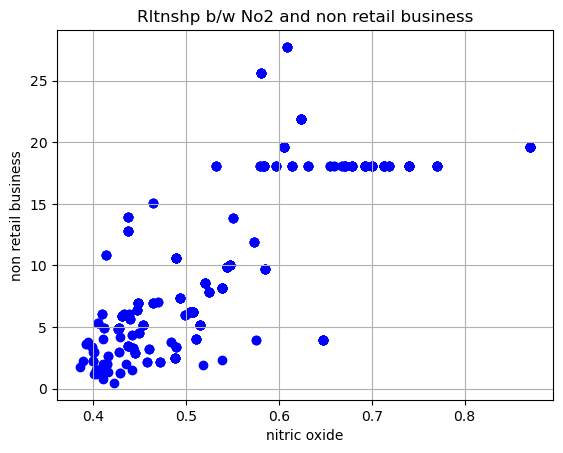

In [9]:
plt.scatter(boston_df['NOX'],boston_df['INDUS'],color='blue')
plt.title("Rltnshp b/w No2 and non retail business")
plt.xlabel('nitric oxide')
plt.ylabel('non retail business')
plt.grid(True)
plt.show()

#### by the above scatter plot no correlation,no relationship can be deduced

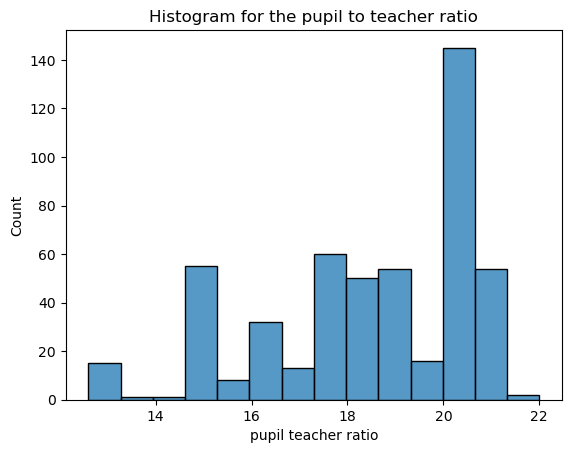

In [10]:
sns.histplot(boston_df['PTRATIO'])
plt.title('Histogram for the pupil to teacher ratio')
plt.xlabel('pupil teacher ratio')
plt.show()

### Difference in median value of houses bounded by the Charles river 

In [11]:
import statsmodels.api as sm
from scipy.stats import ttest_ind
from statsmodels.formula.api import ols

In [14]:
group1_data = boston_df[boston_df['CHAS'] == 1]['MEDV']
group2_data = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_statistic, p_value = ttest_ind(group1_data, group2_data, equal_var=False)

print("T-statistic:", t_statistic)
print("P-value:", p_value)

T-statistic: 3.113291312794837
P-value: 0.003567170098137517


### Difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 

In [17]:
from scipy.stats import f_oneway

boston_df['age_group'] = pd.cut(boston_df['AGE'], bins=[0, 20, 40, 60, 80, 100], labels=['0-20', '20-40', '40-60', '60-80', '80-100'])

f_statistic, p_value = f_oneway(
    boston_df[boston_df['age_group'] == '0-20']['MEDV'],
    boston_df[boston_df['age_group'] == '20-40']['MEDV'],
    boston_df[boston_df['age_group'] == '40-60']['MEDV'],
    boston_df[boston_df['age_group'] == '60-80']['MEDV'],
    boston_df[boston_df['age_group'] == '80-100']['MEDV']
)

print("ANOVA F-statistic:", f_statistic)
print("P-value:", p_value)

ANOVA F-statistic: 20.029107186947982
P-value: 2.5828143681068496e-15


### Relationship between Nitric oxide concentrations and proportion of non-retail business acres per town

In [19]:
from scipy.stats import pearsonr
correlation = boston_df['NOX'].corr(boston_df['INDUS'])
correlation, p_value = pearsonr(boston_df['NOX'], boston_df['INDUS'])

print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("The correlation is statistically significant.")
else:
    print("There is no significant correlation.")

Pearson Correlation Coefficient: 0.7636514469209151
P-value: 7.913361061239527e-98
The correlation is statistically significant.


###  Additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes

In [20]:
boston_df['const'] = 1
X = boston_df[['const', 'DIS']]
y = boston_df['MEDV']
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Thu, 01 Feb 2024   Prob (F-statistic):           1.21e-08
Time:                        15:05:41   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

###  There is a significant relationship between the weighted distance to the Boston employment centers and the median value of owner-occupied homes